In [235]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
path = '/home/dev/data_main/DIV2K/processed_50/HR/train/'

initial = os.listdir(path)
len(initial)

605097

In [237]:
#path ='./results/mobilenet_baseline_no_255/ranks/'

path = './results/ranker_uknown/ranks/'

files = os.listdir(path)

def filter(files, names, epochs, suffix=''):
    out = []
    for n in names:
        for e in epochs:
            for f in files:
                if f'_{n}' in f and f'ep_{e}.' in f:
                    out.append(f)
    return out

def make_dict(files, path,suffix=''):
    out = dict()
    for f in files:
        with open(os.path.join(path, f)) as file:
            lines = file.read()
        numbers = [float(l.split(' ')[1]) for l in lines.split('\n') if len(l)>3]
        names = [l.split(' ')[0] for l in lines.split('\n') if len(l)>3]
        name = f.split('_')[1]
        ep = f.split('_')[3].replace('.txt','')
        #out[f'{name}_ep_{ep}_{suffix}'] = numbers
        out[f'{name}'] = numbers
        out['names'] = names
    return out

In [238]:
name = 'MSE'
files_filtered = filter(files, [name, 'SSIM','PSNR'],[1,2,4,6,19])
data = make_dict(files_filtered, path)
frame = pd.DataFrame(data)


<AxesSubplot:>

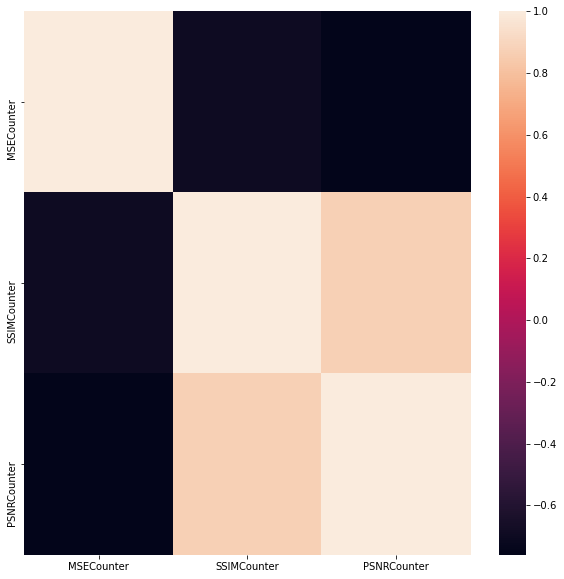

In [239]:
plt.figure(figsize=(10,10))
sns.heatmap(frame.corr())

In [240]:
name = 'SSIM'
files_filtered_zero = filter(files, [name],[2])
files_filtered = filter(files, [name],[19])

In [241]:
data_zero = make_dict(files_filtered_zero, path)
data = make_dict(files_filtered, path)



frame_zero = pd.DataFrame(data_zero).sort_values('names')
frame = pd.DataFrame(data).sort_values('names')

frame_n = copy.copy(frame)
frame_n[f'{name}Counter'] = frame[f'{name}Counter'] - frame_zero[f'{name}Counter']

array([[<AxesSubplot:title={'center':'SSIMCounter'}>]], dtype=object)

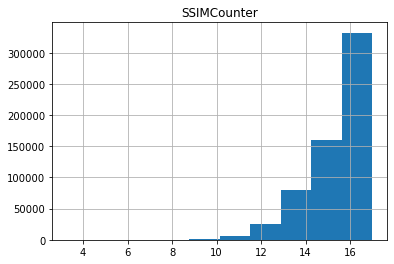

In [242]:
frame_n.hist()

array([[<AxesSubplot:title={'center':'SSIMCounter'}>]], dtype=object)

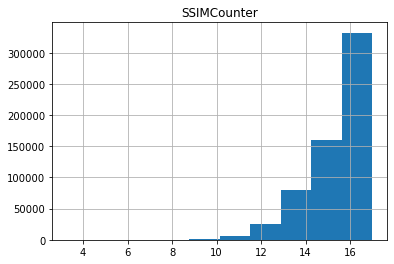

In [243]:
frame_n.hist()

array([[<AxesSubplot:title={'center':'SSIMCounter'}>]], dtype=object)

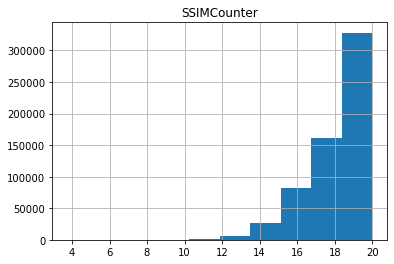

In [244]:
frame.hist()

SSIM

<AxesSubplot:>

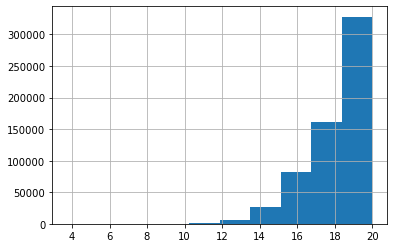

In [245]:
frame[f'{name}Counter'].hist()

PSNR

<AxesSubplot:>

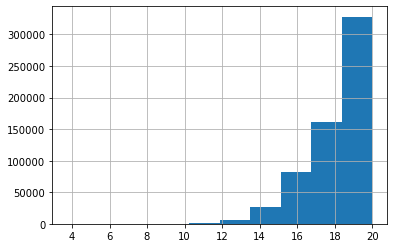

In [188]:
frame[f'{name}Counter'].hist()

MSE

<AxesSubplot:>

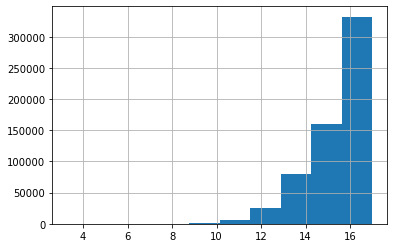

In [189]:
frame_n[f'{name}Counter'].hist()

In [190]:
frame = frame_n
#frame[f'{name}Counter'] = -frame[f'{name}Counter']

Text(0, 0.5, 'accumulated ssim')

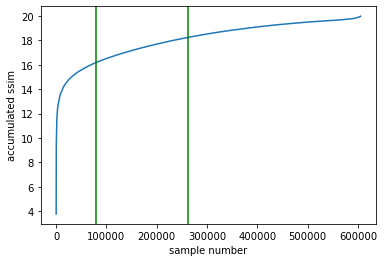

In [249]:
B = 80_000
plt.plot(range(len(frame[f'{name}Counter'].values)), sorted( frame[f'{name}Counter'].values));
plt.axvline(x=B,  color='g')
plt.axvline(x=B+int(len(frame_n)*0.3), color='g')
plt.xlabel('sample number')
plt.ylabel('accumulated ssim')

In [10]:
# mean = frame.mean().values[0]
# std = frame.std().values[0]
# right_bound =  frame.max().values[0]
# right_bound

In [224]:
frame_sorted = frame.sort_values(by=f'{name}Counter')
frame_sorted.head()

,SSIMCounter,names
441046,3.771007,/home/dev/data_main/DIV2K/processed_50/LR/trai...
343352,4.015287,/home/dev/data_main/DIV2K/processed_50/LR/trai...
115585,4.367477,/home/dev/data_main/DIV2K/processed_50/LR/trai...
67790,4.407362,/home/dev/data_main/DIV2K/processed_50/LR/trai...
417956,4.676196,/home/dev/data_main/DIV2K/processed_50/LR/trai...


In [225]:
frame_sorted.shape[0]

605098

In [226]:
int(frame_sorted.shape[0]*0.3)

181529

### 30% subset 

In [227]:
#B = 350_000
subset_size = int(frame_sorted.shape[0]*0.3)

In [228]:
selected = frame_sorted['names'].to_list()[B: B + subset_size]
len(selected)

181529

In [229]:
#os.makedirs('./subsets/')
folder = './subsets/'
name = 'SSIM_30_100kstart.txt'

In [230]:
selected = [l.split(' ')[0].split('/')[-1] for l in selected]

In [231]:
selected[0]

'0697_540_720.png'

In [232]:
with open(os.path.join(folder, name),'w') as f:
    for line in selected:
        f.write(line+'\n')

### SAVE RANDOM SUBSET

In [212]:
folder = './subsets/'
name = 'RANDOM_30_III.txt'

subset_size = 181529

In [213]:
subset_final = frame_sorted.sample(subset_size)
selected_rand = [s.split('/')[-1] for s in subset_final.names.to_list()]

In [214]:
selected_rand[:4]

['0082_840_840.png',
 '0597_1620_120.png',
 '0705_1080_660.png',
 '0059_360_420.png']

In [215]:
selected[:4]

['0320_1200_900.png',
 '0606_1200_1140.png',
 '0127_840_1200.png',
 '0740_720_660.png']

In [216]:
len(set(selected_rand).intersection(set(selected)))

54318

In [258]:
np.array([31.049, 31.068,31.089 ]).std()

0.01633673433979008

In [217]:
with open(os.path.join(folder, name),'w') as f:
    for line in selected_rand:
        f.write(line+'\n')

In [27]:
with open('./subsets/RANDOM_30.txt') as f:
    s = f.read()